___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df=df.rename(columns={"Annual Income (k$)": "Annual_income($)", "Spending Score (1-100)": "Spending_score"})

In [4]:
df.head()

,CustomerID,Gender,Age,Annual_income($),Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        200 non-null    int64 
 1   Gender            200 non-null    object
 2   Age               200 non-null    int64 
 3   Annual_income($)  200 non-null    int64 
 4   Spending_score    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_income($),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


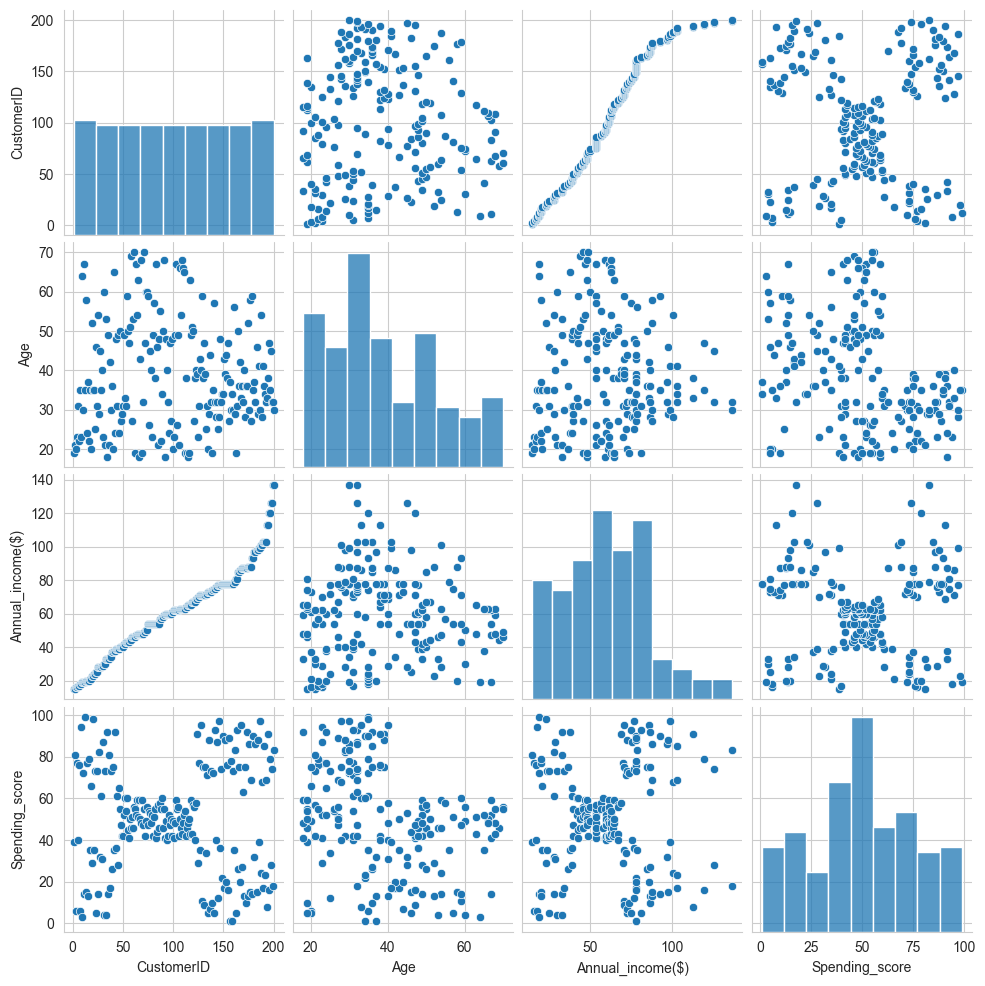

In [7]:
sns.pairplot(df)

# K-means Clustering based on Age and Spending Score

In [8]:
C= df.copy()

In [9]:
X1 = C.drop (["CustomerID","Annual_income($)", "Gender"], axis=1)

In [10]:
X1.head()

,Age,Spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [11]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [12]:
hopkins(X1, X1.shape[0])

0.3133368968473299

In [13]:
from sklearn.cluster import KMeans

In [14]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X1)
    ssd.append(model.inertia_)

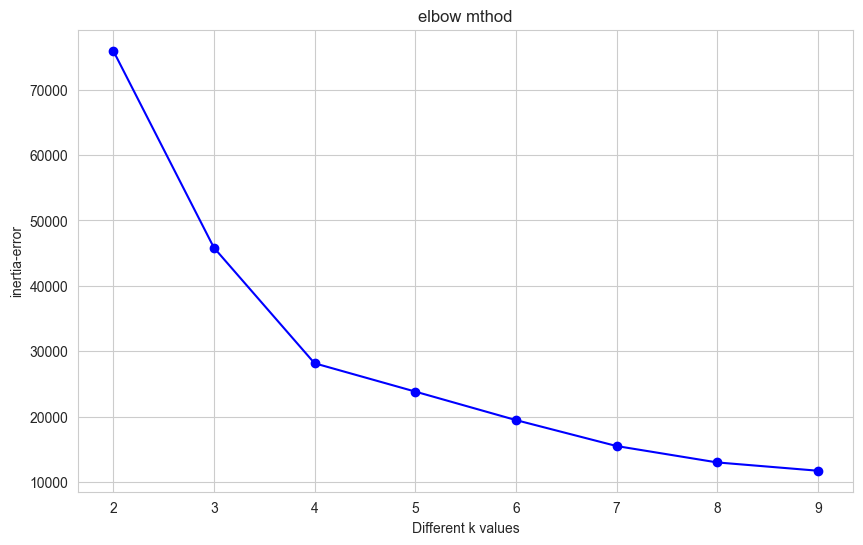

In [15]:
plt.plot(K, ssd, "ob-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow mthod");

In [16]:
ssd

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23838.24882164619,
 19483.1179104427,
 15514.193134351035,
 13006.48362885102,
 11738.020296954508]

In [17]:
pd.Series(ssd).diff()


0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
dtype: float64

In [18]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x: x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332


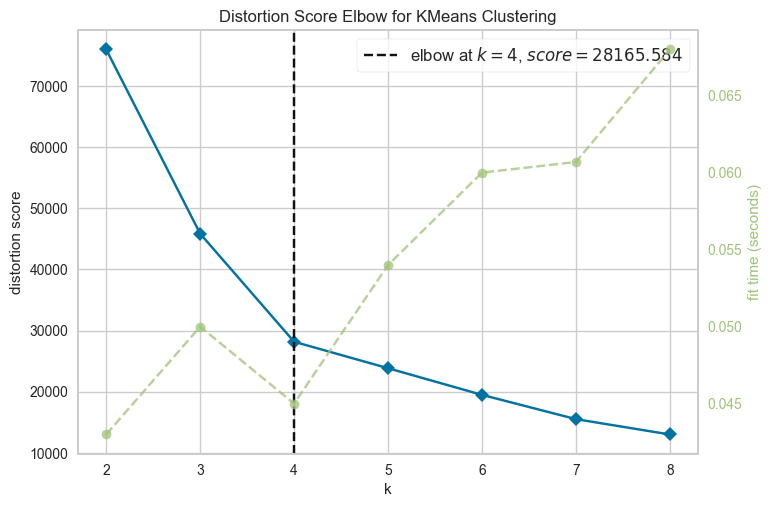

In [19]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show();

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


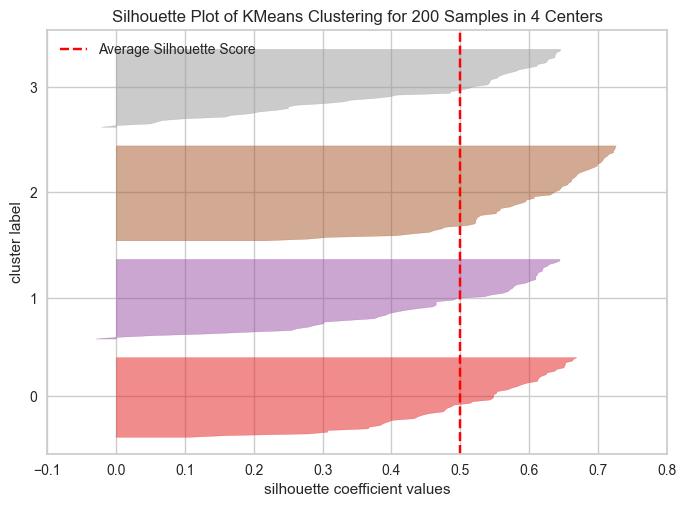

In [22]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

In [23]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit_predict(X1)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [24]:
model.labels_

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
cluster = model.labels_

In [26]:
X1["predicted_clusters"] = cluster

In [27]:
X1.head()

,Age,Spending_score,predicted_clusters
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0


## Visualization Clusters

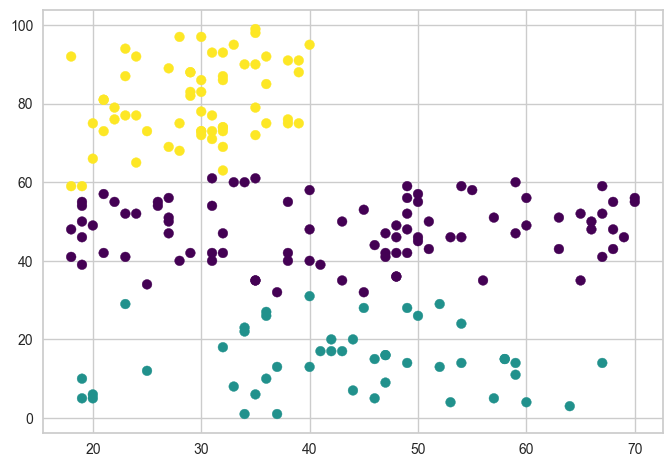

In [28]:
plt.scatter(X1["Age"], X1["Spending_score"], c = X1.predicted_clusters, cmap = "viridis");

# Clustering based on Annual Income and Spending Score

In [29]:
df.head()


,CustomerID,Gender,Age,Annual_income($),Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
X2 = C.drop (["CustomerID","Age", "Gender"], axis=1)

In [31]:
X2.head()

,Annual_income($),Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [32]:
hopkins(X2, X2.shape[0])

0.292089533975451

In [33]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X2)
    ssd.append(model.inertia_)

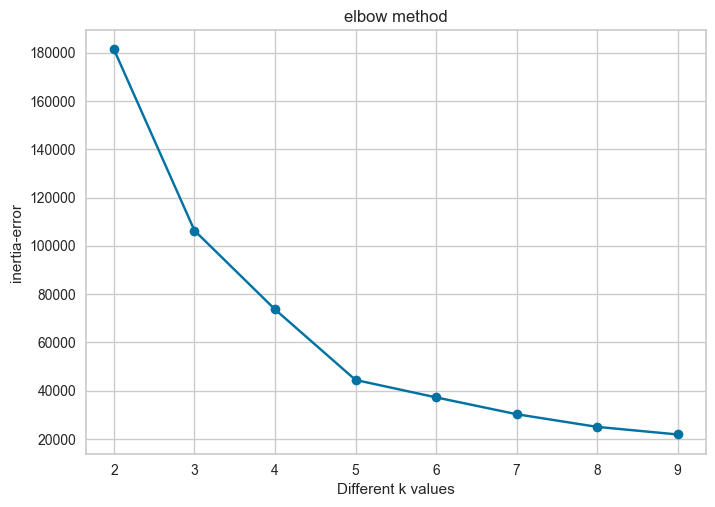

In [34]:
plt.plot(K, ssd, "ob-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method");

In [35]:
ssd

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289]

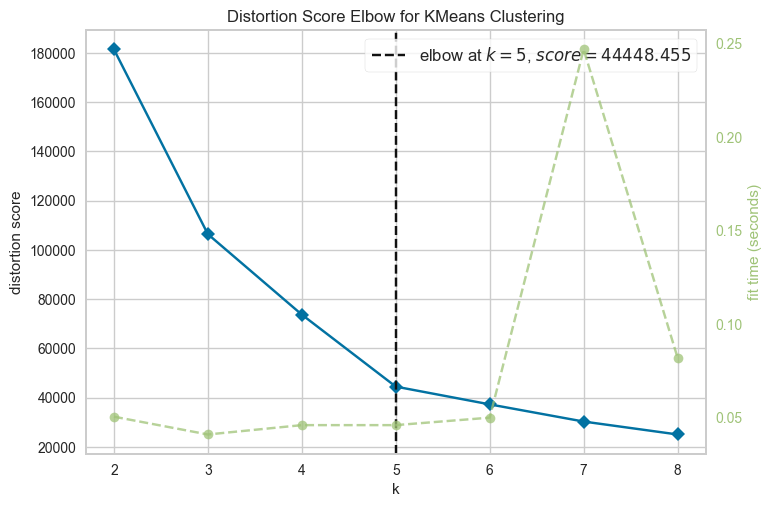

In [36]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [37]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


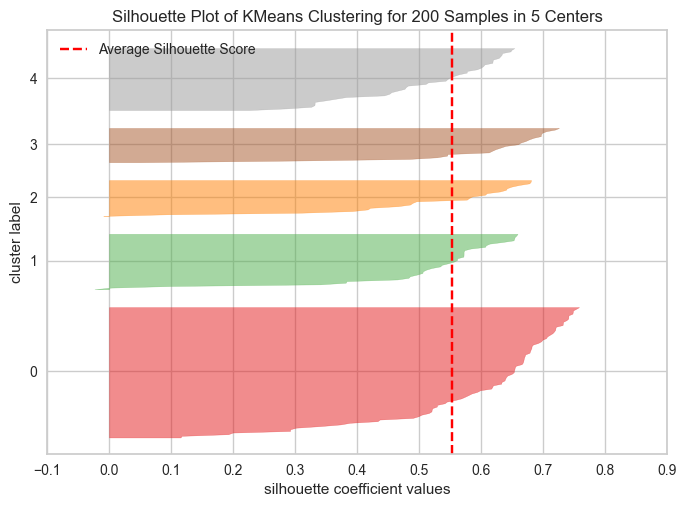

In [38]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [39]:
model = KMeans(n_clusters = 5, random_state = 42)
model.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [40]:
model.labels_
cluster = model.labels_
X2["predicted_clusters"] = cluster
X2.head()

,Annual_income($),Spending_score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


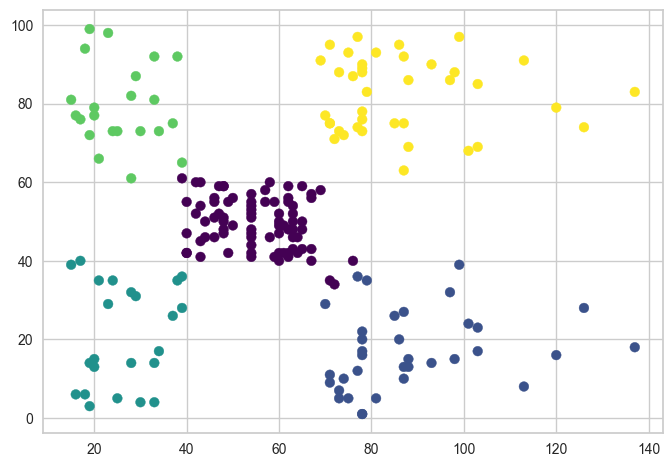

In [41]:
plt.scatter(X2["Annual_income($)"], X2["Spending_score"], c = X2.predicted_clusters, cmap = "viridis");

## Dendrogram

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [43]:
X = df.drop (["CustomerID", "Gender"], axis=1)

In [44]:
X

,Age,Annual_income($),Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [45]:
hc_ward = linkage (y= X, method ="ward") #varyansa göre
hc_complete = linkage (X, "complete") #en uzak noktaya göre
hc_average = linkage (X, "average") #ortalamaya göre
hc_single= linkage(X ,"single") #en yakın noktaya göre

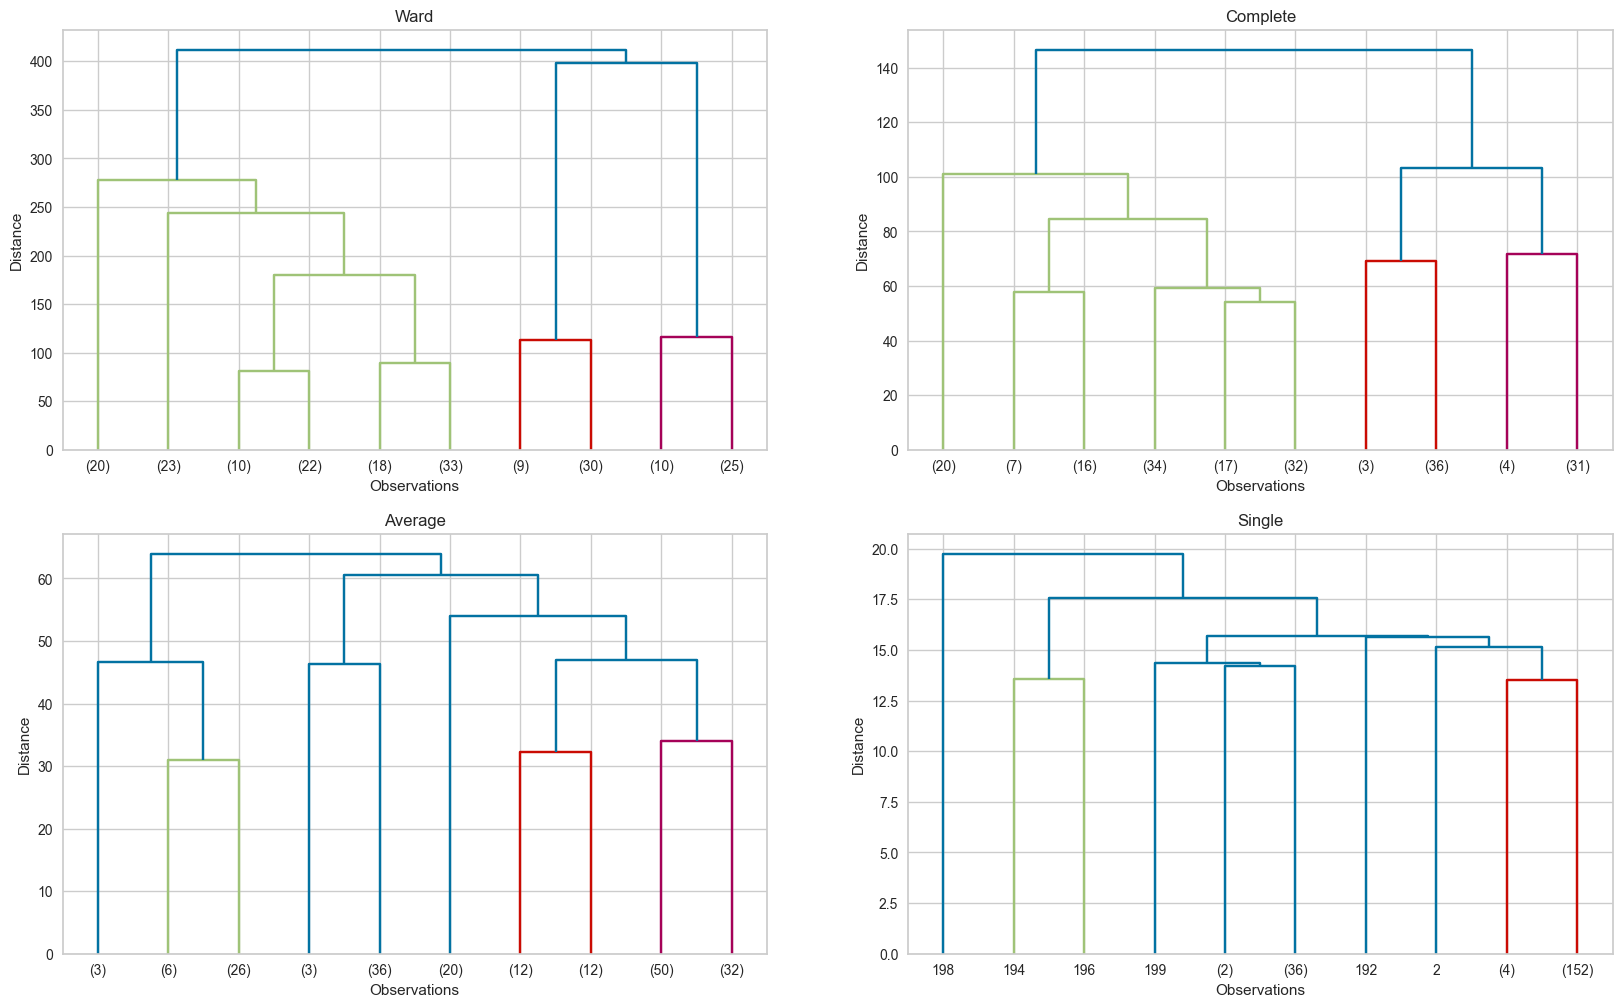

In [46]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p en son dllarda oluşacak küme sayısı
# truncate_mode='lastp'  ?????

## Hierarchical Clustering (Agglomerative)

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.2992593203550994}
f'Silhouette Score for {3} clusters {0.38141795042544546}
f'Silhouette Score for {4} clusters {0.41037986351850747}
f'Silhouette Score for {5} clusters {0.4401889024290193}
f'Silhouette Score for {6} clusters {0.44308912983504156}
f'Silhouette Score for {7} clusters {0.4262301125101286}
f'Silhouette Score for {8} clusters {0.41028404899198817}
f'Silhouette Score for {9} clusters {0.3663955117052502}


In [49]:
model1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") # 
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [50]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

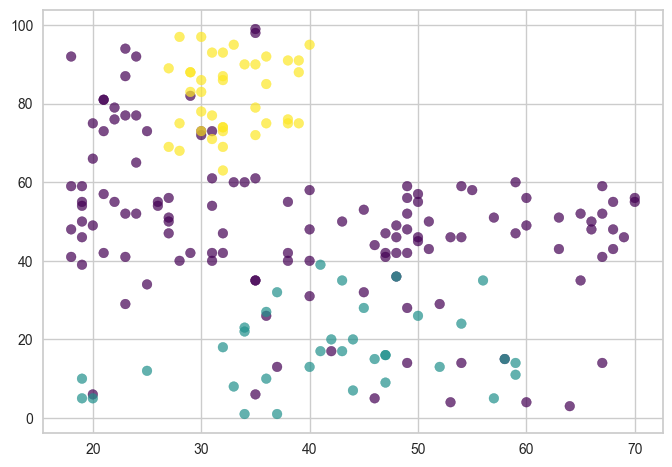

In [51]:
plt.scatter(X["Age"], X["Spending_score"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

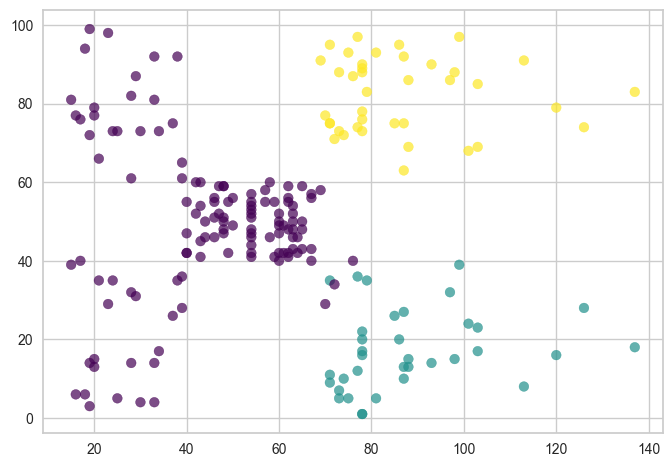

In [52]:
plt.scatter(X["Annual_income($)"], X["Spending_score"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

In [53]:
clusters = model1.labels_

In [54]:
X["predict_clusters"] =clusters

In [55]:
X


,Age,Annual_income($),Spending_score,predict_clusters
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


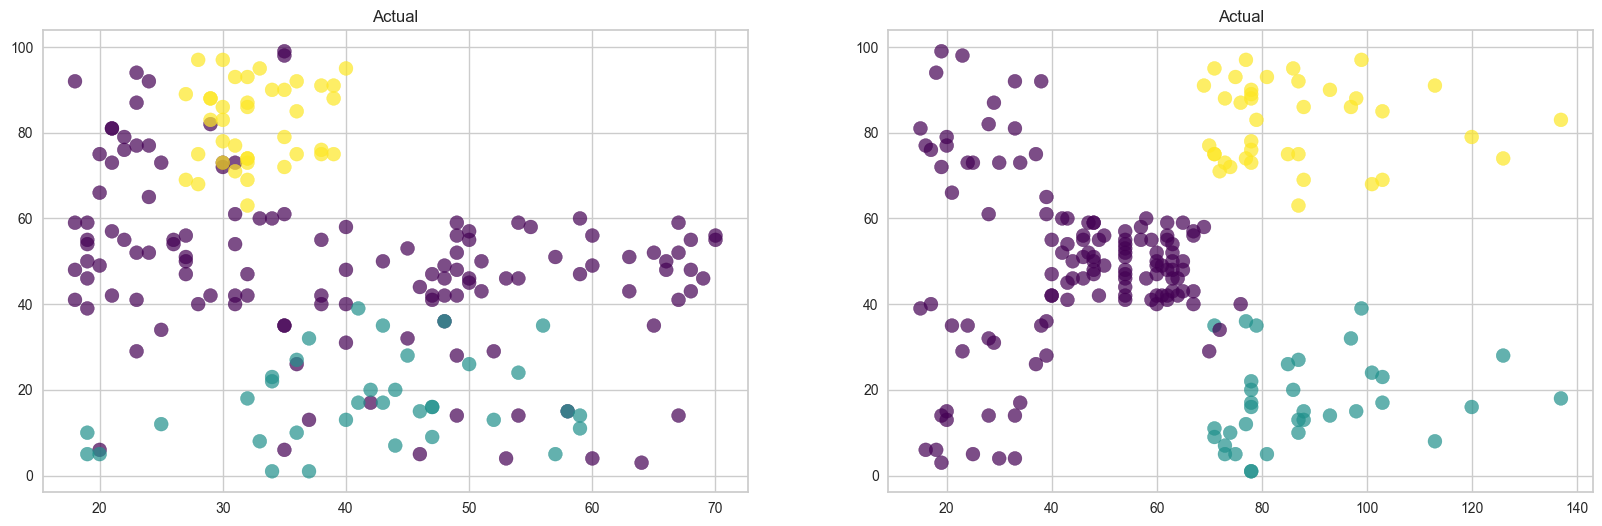

In [56]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["Age"], X["Spending_score"], c = X.predict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["Annual_income($)"], X["Spending_score"], c = X.predict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual");

___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___